# OpenABM-Covid19 - Multiple working sectors
This colab shows a simple example of modeling multiple working sectors in OpenABM.


In [1]:
import example_utils as utils
import numpy as np
import pandas as pd

n_total = 10000
params = utils.get_baseline_parameters()
params.set_param( "n_total", n_total )

By default, OpenABM has five occupational networks: `primary`, `secondary`, `working`, `retired` and `elderly`. OpenABM also allows users to define multiple working networks. In this example, we'll define six working networks. Therefore, we'll have ten occupational networks in total, namely, `primary`, `secondary`, `sector_1`, ..., `sector_6`, `retired`, and `elderly` networks.

### Step 1 - Define occupational networks
For each network, we need to define its own parameters: `network_no`, `age_type`, `mean_work_interaction`, `lockdown_multiplier`, `network_id` and `network_name`.  Note the code assumes the following conventions:


*   The first two networks (i.e. network_no 0 and 1) are `primary` and `secondary` networks
*   The last two networks are `retired` and `elderly` networks.





In [2]:
n_networks = 10
network_no = np.arange(n_networks)
network_name = np.array(['primary', 'secondary', 'sector_1', 'sector_2', 'sector_3', 'sector_4', 'sector_5', 'sector_6', 'retired', 'elderly'])
age_type = np.array([0, 0, 1, 1, 1, 1, 1, 1, 2, 2]) # 0 - AGE_TYPE_CHILD, 1 - AGE_TYPE_ADULT, 2 - AGE_TYPE_ELDERLY
mean_work_interactin = np.array([10, 10, 7, 7, 7, 7, 7, 7, 3, 3])
lockdown_multiplier = np.ones(n_networks) * 0.22

occupation_networks = pd.DataFrame({
    'network_no': network_no,
    'age_type': age_type,
    'mean_work_interaction': mean_work_interactin,
    'lockdown_multiplier': lockdown_multiplier,
    'network_id': network_no,
    'network_name': network_name,
})


### Step 2 - Assign occupational networks to individiuals

Next, we assign each individual an occupational network number. For this example, we randomly assign the networks.

In [3]:
IDs = np.arange(n_total)
assignment = np.random.randint(0, n_networks, n_total)
occupation_network_assignment  = pd.DataFrame({'ID':IDs,
                                               'network_no':assignment})


### Step 3 - Add occupational network and assignment tables to the parameters

In [4]:
params.set_occupation_network_table(occupation_network_assignment, 
                                    occupation_networks)

We now construct and run the model for 100 days, and plot the time-sereies of the total number of people infected.

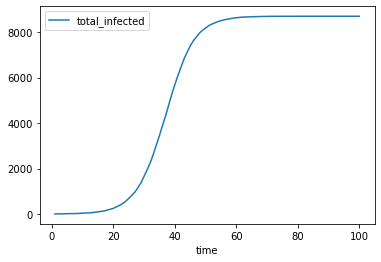

In [5]:
sim = utils.get_simulation( params )
sim.steps( 100 )
timeseries = pd.DataFrame( sim.results )
timeseries.plot( x = "time", y = "total_infected" )

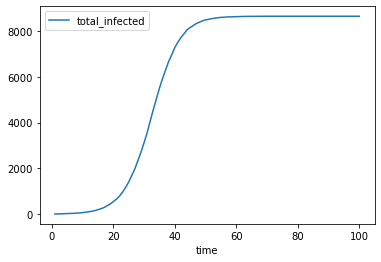

In [5]:
sim = utils.get_simulation( params )
sim.steps( 100 )
timeseries = pd.DataFrame( sim.results )
timeseries.plot( x = "time", y = "total_infected" )